In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import FTestAnovaPower
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [215]:
file = 'C:/Users/mdbla/Documents/UW_VM_Capstone_2024/HTI/Preprocessed_Data/Pam194_ObjCell_standard.csv'

clean_data = pd.read_csv(file, sep = ',')

clean_data.head()

,Unnamed: 0,ImageNumber,ObjectNumber,Metadata_Metadata_Cytokine,Metadata_Metadata_Dose,Metadata_Plate,Metadata_Well,AreaShape_Area,AreaShape_Orientation,Granularity_1_CorrActin,...,Texture_Contrast_CorrMito_3_02_256,Texture_Contrast_CorrMito_3_03_256,Texture_Contrast_CorrNileRed_3_00_256,Texture_Contrast_CorrNileRed_3_01_256,Texture_Contrast_CorrNileRed_3_02_256,Texture_Contrast_CorrNileRed_3_03_256,Texture_Contrast_CorrWGA_3_00_256,Texture_Contrast_CorrWGA_3_01_256,Texture_Contrast_CorrWGA_3_02_256,Texture_Contrast_CorrWGA_3_03_256
0,0,1,1,IFNg,33,Plate 1,B10,0.023633,0.162161,0.621509,...,0.066721,0.105668,0.004248,0.002979,0.003640,0.002365,0.027764,0.021816,0.039195,0.043983
1,1,1,2,IFNg,33,Plate 1,B10,0.201806,0.774438,0.685750,...,0.011581,0.014219,0.002751,0.002114,0.003533,0.002013,0.025764,0.019083,0.036872,0.036337
2,2,1,3,IFNg,33,Plate 1,B10,0.066095,0.644340,0.676748,...,0.034296,0.030419,0.008844,0.006727,0.010421,0.006714,0.075632,0.073224,0.095058,0.103654
3,3,1,4,IFNg,33,Plate 1,B10,0.126617,0.842324,0.606287,...,0.030470,0.021108,0.003947,0.003469,0.004755,0.002491,0.082486,0.092707,0.095009,0.067871
4,4,1,5,IFNg,33,Plate 1,B10,0.069745,0.896848,0.659443,...,0.034850,0.022948,0.002995,0.004340,0.006720,0.003295,0.039213,0.061849,0.101783,0.105671


In [216]:
# running some basic stats on the features

features = clean_data.iloc[:,7:]

features.describe().T

,count,mean,std,min,25%,50%,75%,max
AreaShape_Area,94370.0,0.060598,0.064582,0.0,0.019854,0.038939,0.076966,1.0
AreaShape_Orientation,94370.0,0.500640,0.256815,0.0,0.309798,0.500864,0.691352,1.0
Granularity_1_CorrActin,94370.0,0.621688,0.063817,0.0,0.579518,0.616982,0.658508,1.0
Granularity_1_CorrDNA2,94370.0,0.720556,0.128882,0.0,0.643399,0.744353,0.815829,1.0
Granularity_1_CorrGolgi,94370.0,0.561816,0.066838,0.0,0.518136,0.557315,0.600867,1.0
...,...,...,...,...,...,...,...,...
Texture_Contrast_CorrNileRed_3_03_256,94370.0,0.012618,0.022414,0.0,0.003513,0.006228,0.012546,1.0
Texture_Contrast_CorrWGA_3_00_256,94370.0,0.037386,0.050376,0.0,0.011802,0.021057,0.041001,1.0
Texture_Contrast_CorrWGA_3_01_256,94370.0,0.035189,0.048346,0.0,0.010398,0.019229,0.038606,1.0
Texture_Contrast_CorrWGA_3_02_256,94370.0,0.047232,0.061825,0.0,0.014945,0.027168,0.052991,1.0


# Statistical Analyses

#### These analyses should be conducted with a smaller set of features post-PCA 

In [217]:
cytokine_df = clean_data.iloc[:,np.r_[3:7,7:103]] # This data only contains our cytokine variable and featrues

cytokine_df.head()

,Metadata_Metadata_Cytokine,Metadata_Metadata_Dose,Metadata_Plate,Metadata_Well,AreaShape_Area,AreaShape_Orientation,Granularity_1_CorrActin,Granularity_1_CorrDNA2,Granularity_1_CorrGolgi,Granularity_1_CorrMito,...,Texture_Contrast_CorrMito_3_00_256,Texture_Contrast_CorrMito_3_01_256,Texture_Contrast_CorrMito_3_02_256,Texture_Contrast_CorrMito_3_03_256,Texture_Contrast_CorrNileRed_3_00_256,Texture_Contrast_CorrNileRed_3_01_256,Texture_Contrast_CorrNileRed_3_02_256,Texture_Contrast_CorrNileRed_3_03_256,Texture_Contrast_CorrWGA_3_00_256,Texture_Contrast_CorrWGA_3_01_256
0,IFNg,33,Plate 1,B10,0.023633,0.162161,0.621509,0.670366,0.541776,0.683105,...,0.085657,0.055899,0.066721,0.105668,0.004248,0.002979,0.003640,0.002365,0.027764,0.021816
1,IFNg,33,Plate 1,B10,0.201806,0.774438,0.685750,0.820995,0.549520,0.623303,...,0.010118,0.010156,0.011581,0.014219,0.002751,0.002114,0.003533,0.002013,0.025764,0.019083
2,IFNg,33,Plate 1,B10,0.066095,0.644340,0.676748,0.627520,0.558440,0.574556,...,0.026440,0.039005,0.034296,0.030419,0.008844,0.006727,0.010421,0.006714,0.075632,0.073224
3,IFNg,33,Plate 1,B10,0.126617,0.842324,0.606287,0.496211,0.570468,0.613697,...,0.026743,0.042283,0.030470,0.021108,0.003947,0.003469,0.004755,0.002491,0.082486,0.092707
4,IFNg,33,Plate 1,B10,0.069745,0.896848,0.659443,0.563880,0.542723,0.615665,...,0.016920,0.043490,0.034850,0.022948,0.002995,0.004340,0.006720,0.003295,0.039213,0.061849


### Group Difference: Average Values for Cytokines by Dosage (not including 'untr' or 'untr-50')

##### Method for Hypthesis testing: ANOVA & Tukey HSD

#### The following analysis consists of one-way ANOVA, which tests if there is a significant difference between any of the features for each cytokine

#### H0: M(11 ng/ml) = M(33 ng/ml) = M(100 ng/ml)

In [222]:
def run_ANOVA_doses(cytokine, feature, df):
    # Dropping the Dose and Well columns
    df_doses = df.drop(['Metadata_Plate', 'Metadata_Well'], axis=1)
    final_df = pd.DataFrame(columns=['Cytokine', 'Feature', 'F-stat', 'P-value'])
    
    # subsetting the dataframe for the specified untreated cells
    sub_cyto_df = df_doses[df_doses['Metadata_Metadata_Cytokine'] == cytokine]
    obs = len(sub_cyto_df)
    
    # Calculating the power for this test using the size of the above subset
    power = TTestPower()
    anova_power = power.solve_power(nobs=obs, effect_size=0.5, power=None, alpha=0.05)
    
    # Group the subset by plate and perform One-Way ANOVA
    sub_df = sub_cyto_df[['Metadata_Metadata_Dose', feature]]
    grps = [d[feature] for _, d in sub_df.groupby('Metadata_Metadata_Dose')]
    F, p = f_oneway(*grps)
    
    # Append the results of our One-Way ANOVA to a dataframe and then return it along with the power
    final_df.loc[0] = [cytokine, feature, F, p]

    return final_df,anova_power

cytokine='IL26'
feature='Granularity_1_CorrActin'

results = run_ANOVA_doses(cytokine, feature, cytokine_df)
print('The power for this One-Way ANOVA test is ' + str(results[1]))
print(results[0])

The power for this One-Way ANOVA test is 1.0
  Cytokine                  Feature     F-stat       P-value
0     IL26  Granularity_1_CorrActin  23.773958  5.141872e-11


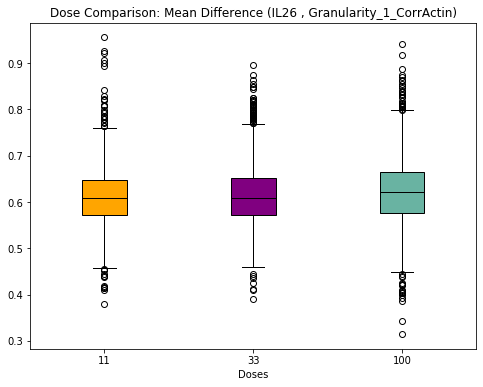

In [225]:
# Plot means of wells for each feature and each cytokine

def plot_by_dose(cytokine, feature, df):
    cytokine_dose = df[(df['Metadata_Metadata_Cytokine'] == cytokine)]
    cytokine_dose = cytokine_dose[['Metadata_Metadata_Dose', feature]]
    grouped = cytokine_dose.groupby('Metadata_Metadata_Dose')[feature]

    fig,ax = plt.subplots(figsize=(8,6))

    boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                         labels=grouped.groups.keys(),
                         patch_artist=True,
                         medianprops={'color': 'black'}
                        )
    # Define colors for each group
    colors = ['orange', 'purple', '#69b3a2']

    # Assign colors to each box in the boxplot
    for box, color in zip(boxplot['boxes'], colors):
        box.set_facecolor(color)
        
    # Add a title and axis label
    ax.set_title('Dose Comparison: Mean Difference (' + cytokine + ' , ' + feature + ')')
    ax.set_xlabel('Doses')

results = plot_by_dose(cytokine, feature, cytokine_df)

##### The following Tukey HSD analysis is a pairwise t-test for each feature to see which pair of cytokine doses are significantly different from one another 

##### H0: For each of our selected features, dosage does not contribute to any significant difference in the averages for our cytokines

In [229]:
def doses_Tukey_HSD(cytokine, feature, df):
    cytokine_doses = df[(df['Metadata_Metadata_Cytokine'] == cytokine)]
    cytokine_doses = cytokine_doses[['Metadata_Metadata_Dose', feature]]
    
    res = pairwise_tukeyhsd(endog=cytokine_doses[feature],
                          groups=cytokine_doses['Metadata_Metadata_Dose'],
                          alpha=0.05)
    
    return res

result = doses_Tukey_HSD(cytokine, feature, cytokine_df)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    11     33   0.0029 0.3134 -0.0018 0.0076  False
    11    100   0.0127  0.001  0.0081 0.0172   True
    33    100   0.0098  0.001  0.0053 0.0143   True
---------------------------------------------------


### Group Difference: Average Values for Cytokines by Wells

##### H0: For each of our selected features, our wells should not contribute to any significant difference in the averages for our cytokines

##### For this analysis, we'll only look at each cytokine at 100 ng/ml

##### Method for Hypthesis testing: t-test

In [236]:
# Below is a funciton that will run t-test for each cytokine across both wells at 100 ng/ml

def get_ttest_wells(cytokine, feature, df):
    ttest_df = pd.DataFrame(columns=['Cytokine', 'Feature', 'Well Comparison', 'T-Statistic', 'p-value', 'Power'])
    cytokine_wells = df[(df['Metadata_Metadata_Dose'] == 100) & (df['Metadata_Metadata_Cytokine'] == cytokine)]
    obs = len(cytokine_wells)
    wells = cytokine_wells['Metadata_Well'].unique().tolist()
    
    well_1 = wells[0]
    well_2 = wells[1]
    
    well_comp = str(well_1) + ' vs ' + str(well_2)
    
    well_1_means = cytokine_wells.where(cytokine_wells['Metadata_Well'] == well_1).dropna()[feature]
    well_2_means = cytokine_wells.where(cytokine_wells['Metadata_Well'] == well_2).dropna()[feature]
    
    results = stats.ttest_ind(well_1_means,well_2_means, equal_var=False)
    power = TTestPower()
    ttest_power = power.solve_power(nobs=obs, effect_size=0.5, power=None, alpha=0.05)
    
    Tstat = round(results[0],3)
    Pvalue = round(results[1],3)
    
    ttest_df = ttest_df.append({'Cytokine' : cytokine, 'Feature': feature, 'Well Comparison': well_comp,
                               'T-Statistic': Tstat, 'p-value': Pvalue, 'Power': ttest_power}, ignore_index=True)
    return ttest_df
    
results = get_ttest_wells(cytokine, feature, cytokine_df)

print(results)
#print(cytokine_df.isnull().any().sum().sum())

  Cytokine                  Feature Well Comparison  T-Statistic  p-value  \
0     IL26  Granularity_1_CorrActin        F2 vs G2        5.365      0.0   

   Power  
0    1.0  


##### The following supplementary plot is to visualize the mean difference across wells for a given cytokine and feature at 100 ng/ml

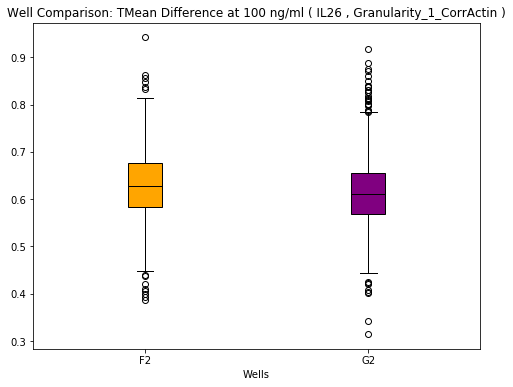

In [237]:
# Plot means of wells for each feature and each cytokine

def plot_by_wells(cytokine, feature, df):
    cytokine_wells = df[(df['Metadata_Metadata_Dose'] == 100) & (df['Metadata_Metadata_Cytokine'] == cytokine)]
    cytokine_wells = cytokine_wells[['Metadata_Well', feature]]
    grouped = cytokine_wells.groupby('Metadata_Well')[feature]

    fig,ax = plt.subplots(figsize=(8,6))

    boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                         labels=grouped.groups.keys(),
                         patch_artist=True,
                         medianprops={'color': 'black'}
                        )
    # Define colors for each group
    colors = ['orange', 'purple', '#69b3a2']

    # Assign colors to each box in the boxplot
    for box, color in zip(boxplot['boxes'], colors):
        box.set_facecolor(color)
        
    # Add a title and axis label
    ax.set_title('Well Comparison: TMean Difference at 100 ng/ml ( ' + cytokine + ' , ' + feature + ' )')
    ax.set_xlabel('Wells')

results = plot_by_wells(cytokine, feature, cytokine_df)

### Group Difference: Average Values for Untreated Cells by Plate

##### H0: For each of our selected features, the plates should not contribute to any significant difference in the averages for our untreated cells

#### Reminder: cytokines vary from plate to plate, but each plate is treated with the same untr and untr-50 cells

#### Similar to the analysis above, if any significant differences are detected, we shoud capture this in some way as it suggests that the mean differences that we observe may be contributed to contaminated plates or some external factor in the lab

##### Method for Hypthesis testing: ANOVA & Tukey-HSD

In [238]:
# Perform One-Way ANOVA to test mean differences across plates

def run_ANOVA_plates(untr, feature, df):
    # Dropping the Dose and Well columns
    df_doses = df.drop(['Metadata_Metadata_Dose', 'Metadata_Well'], axis=1)
    final_df = pd.DataFrame(columns=['Cytokine', 'Feature', 'F-stat', 'P-value'])
    
    # subsetting the dataframe for the specified untreated cells
    sub_cyto_df = df_doses[df_doses['Metadata_Metadata_Cytokine'] == untr]
    obs = len(sub_cyto_df)
    
    # Calculating the power for this test using the size of the above subset
    power = TTestPower()
    anova_power = power.solve_power(nobs=obs, effect_size=0.5, power=None, alpha=0.05)
    
    # Group the subset by plate and perform One-Way ANOVA
    sub_df = sub_cyto_df[['Metadata_Plate', feature]]
    grps = [d[feature] for _, d in sub_df.groupby('Metadata_Plate')]
    F, p = f_oneway(*grps)
    
    # Append the results of our One-Way ANOVA to a dataframe and then return it along with the power
    final_df.loc[0] = [cytokine, feature, F, p]

    return final_df,anova_power

results = run_ANOVA_plates('untr', feature, cytokine_df)
print("The power for this ANOVA test is ", + results[1])
print(results[0])

The power for this ANOVA test is  1.0
  Cytokine                  Feature      F-stat        P-value
0     IL26  Granularity_1_CorrActin  428.086047  2.305049e-176


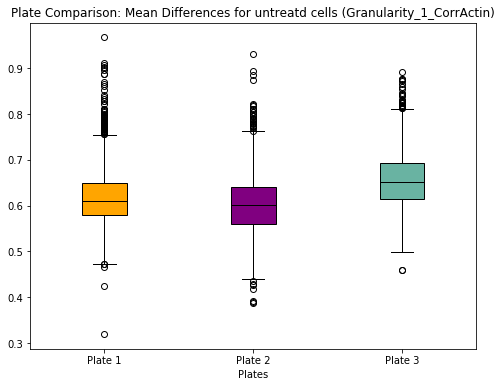

In [239]:
# Visualizing the mean differences

def plot_by_plate(untr, feature, df):
    cytokine_plate = df[(df['Metadata_Metadata_Cytokine'] == untr)]
    cytokine_plate = cytokine_plate[['Metadata_Plate', feature]]
    grouped = cytokine_plate.groupby('Metadata_Plate')[feature]

    fig,ax = plt.subplots(figsize=(8,6))

    boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                         labels=grouped.groups.keys(),
                         patch_artist=True,
                         medianprops={'color': 'black'}
                        )
    # Define colors for each group
    colors = ['orange', 'purple', '#69b3a2']

    # Assign colors to each box in the boxplot
    for box, color in zip(boxplot['boxes'], colors):
        box.set_facecolor(color)
        
    # Add a title and axis label
    ax.set_title('Plate Comparison: Mean Differences for untreatd cells (' + feature + ')')
    ax.set_xlabel('Plates')

results = plot_by_plate('untr', feature, cytokine_df)

##### The following Tukey HSD analysis is a pairwise t-test for each feature to see which pair of plates have significantly different means among our untreated cells fore each features

##### H0: For each of our selected features, the plates does not contribute to any significant difference in the average feature mean for our untreated cells

In [240]:
# The following function will serve to supplement the above One-Way ANOVA by identifying which specific pairs 
# of plates are significantly different - Ideally, our dashboard should call this function when there is a significant
# difference between plates for cytokine

def plate_Tukey_HSD(untr, feature, df):
    untr_plates = df[(df['Metadata_Metadata_Cytokine'] == cytokine)]
    untr_plates = untr_plates[['Metadata_Plate', feature]]
    
    res = pairwise_tukeyhsd(endog=untr_plates[feature],
                          groups=untr_plates['Metadata_Metadata_Dose'],
                          alpha=0.05)
    
    return res

result = doses_Tukey_HSD(cytokine, feature, cytokine_df)
print(result)
    

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    11     33   0.0029 0.3134 -0.0018 0.0076  False
    11    100   0.0127  0.001  0.0081 0.0172   True
    33    100   0.0098  0.001  0.0053 0.0143   True
---------------------------------------------------
